In [116]:
import pandas, numpy
import re
from matplotlib import pyplot
import scipy.stats
from sklearn.linear_model import LinearRegression
from collections import Counter
from sklearn.cluster import KMeans
import statistics as stats
from collections import Counter, OrderedDict
import operator

In [277]:
ufo = pandas.read_csv("UFO-Sightings-2015.csv", encoding='latin1')
ufo.head()

,Date,City,State,Position,Shape,Duration,Summary
0,"DateObject[{2015, 1, 1, 0, 0, 0.}, ""Instant"", ...","Entity[""City"", {""LaPuente"", ""California"", ""Uni...","Entity[""AdministrativeDivision"", {""California""...","GeoPosition[{34.0323333, -117.9535204}]",formation,"Quantity[10, ""Minutes""]",3 orbs of light flying in slow formation.
1,"DateObject[{2015, 1, 1, 0, 0, 0.}, ""Instant"", ...","Entity[""City"", {""SanAntonio"", ""Texas"", ""United...","Entity[""AdministrativeDivision"", {""Texas"", ""Un...","GeoPosition[{29.4724026, -98.5251419}]",sphere,"Missing[""NoInput""]",Captured on video a UFO hovering over us as we...
2,"DateObject[{2015, 1, 1, 0, 0, 0.}, ""Instant"", ...","Entity[""City"", {""VirginiaBeach"", ""Virginia"", ""...","Entity[""AdministrativeDivision"", {""Virginia"", ...","GeoPosition[{36.7793219, -76.0240202}]",disk,"Quantity[20, ""Minutes""]",Orange glowing domed shaped disks with red lig...
3,"DateObject[{2015, 1, 1, 0, 1, 0.}, ""Instant"", ...","Entity[""City"", {""RioDell"", ""California"", ""Unit...","Entity[""AdministrativeDivision"", {""California""...","GeoPosition[{40.4955909, -124.1149295}]",fireball,"Quantity[5, ""Minutes""]",Orange ball of light/fire seen on North Coast;...
4,"DateObject[{2015, 1, 1, 0, 1, 0.}, ""Instant"", ...","Entity[""City"", {""RockawayBeach"", ""Oregon"", ""Un...","Entity[""AdministrativeDivision"", {""Oregon"", ""U...","GeoPosition[{45.6168723, -123.9390674}]",fireball,"Quantity[4, ""Minutes""]","Five small, orange floating objects seen overh..."


In [278]:
length_of_set = len(ufo['Date'])
print(length_of_set)

4163


## UFO Date/Time Column Clean

In [279]:
# Date Clean Column 
date_column = ufo['Date']
expression = re.compile("\{(.*?)\}")
print(date_column[0])

date_cleaned = []
# Use regular expressions to sort through JSON Objects
for value in date_column:
    results = expression.findall(value)
    split_res = re.split(", ", results[0])
    date_cleaned.append(split_res)

# update column in data frame 
ufo['Date'] = date_cleaned

DateObject[{2015, 1, 1, 0, 0, 0.}, "Instant", "Gregorian", 0.]


In [280]:
print(ufo['Date'][0])

['2015', '1', '1', '0', '0', '0.']


In [281]:
# Most Frequent Months/Days/Hours
months = []
days = []
hour_of_day = []
month_days = []

# appending months/days/hours to their own list to analyse 
for date_object in date_cleaned: 
    months.append(int(date_object[1]))
    days.append(int(date_object[2]))
    date_tup = tuple([int(date_object[1]),int(date_object[2])])
    month_days.append(date_tup)
    hour_of_day.append(int(date_object[3]))

month_counter = Counter(months)
day_counter = Counter(days)
hour_counter = Counter(hour_of_day)
month_days_counter = Counter(month_days)

# Printing the top 5 most common date types
print("Months:")
print(month_counter.most_common(5))
print("Days:")
print(day_counter.most_common(5))
print("Full Dates:")
print(month_days_counter.most_common(5))
print("Hours:")
print(hour_counter.most_common(5))

Months:
[(11, 592), (7, 461), (9, 450), (10, 415), (8, 399)]
Days:
[(7, 296), (4, 233), (1, 173), (8, 163), (11, 163)]
Full Dates:
[((11, 7), 207), ((7, 4), 122), ((9, 27), 49), ((1, 1), 37), ((9, 6), 32)]
Hours:
[(21, 714), (22, 573), (20, 503), (23, 382), (18, 336)]


## Analysizing Date Information 

Most common months for UFO sightings were from July-November with November having the most. Most common days of the month were in the first half, the 7th occuring most frequently. UFO sightings were most often seen during late evening/night time. 

Visual representations of this inofrmation are displayed below by histograms. 

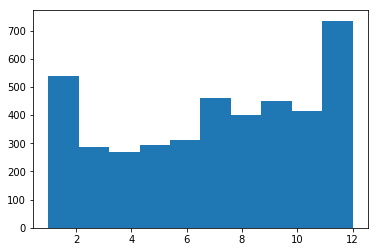

In [282]:
# Months Histogram
pyplot.hist(months)
pyplot.show()

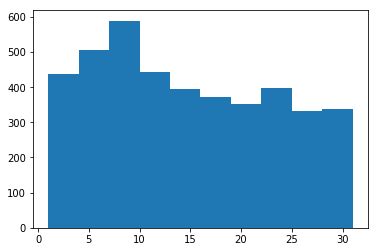

In [283]:
# Days Histogram
pyplot.hist(days)
pyplot.show()

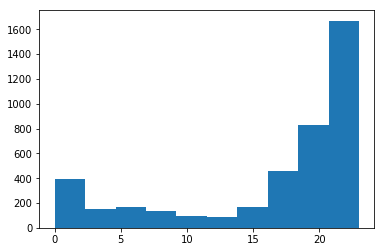

In [284]:
#Hours Histogram
pyplot.hist(hour_of_day)
pyplot.show()

## Dates of Documented Meteorite Showers Visible in the Northern Hemisphere in 2015

Lyrids:  April 16-25
    - luminous dust trains observable for several seconds.
Perseids: July 13-Aug. 26
    - fast and bright meteors that frequently leave trains
Orionids: Oct. 4-Nov. 14
    - known for being bright and quick. Best viewing will be pre-dawn.
Geminids: Dec. 4-16
    - The Geminids are often bright and intensely colored. Due to their medium-slow velocity, persistent trains are not usually seen. 

Source: 
https://www.nasa.gov/beta/jpl/asteroids/best-meteor-showers


In [285]:
print(month_days_counter.most_common(10))

[((11, 7), 207), ((7, 4), 122), ((9, 27), 49), ((1, 1), 37), ((9, 6), 32), ((11, 8), 27), ((5, 1), 25), ((7, 31), 25), ((11, 1), 25), ((7, 11), 24)]


In [286]:
# Creating list of overlaps for meteor shower dates
meteor_match_lyrids = []
match_perseids = []
match_orionids = []
match_geminids = [] 

for sighting in month_days:
    if sighting[0] == 5 and sighting[1] > 15 and sighting[1] < 25:
        meteor_match_lyrids.append(sighting) 
    elif sighting[0] == 7 and sighting[1] > 12 or sighting[0] == 8 and sighting[1] < 27:
        match_perseids.append(sighting)
    elif sighting[0] == 10 and sighting[1] > 3 or sighting[0] == 11 and sighting[1] < 15:
        match_orionids.append(sighting)
    elif sighting[0] == 12 and sighting[1] > 3 and sighting[1] < 15:
        match_geminids.append(sighting)
        
print("Lyrids Match Count= " + str(len(meteor_match_lyrids)))
print("Perseids Match Count= " + str(len(match_perseids)))
print("Orionids Match Count= " + str(len(match_orionids)))
print("Geminids Match Count= " + str(len(match_geminids)))

meteor_sum = len(meteor_match_lyrids) + len(match_perseids) + len(match_orionids) + len(match_geminids)
meteor_ratio = meteor_sum / length_of_set
print("UFO/Meteorite Shower Overlap Date Count= " + str(meteor_sum))
print("Ratio of Overlapping Meteorite Shower Dates to Overall UFO Sightings= " + str(meteor_ratio))



Lyrids Match Count= 81
Perseids Match Count= 558
Orionids Match Count= 788
Geminids Match Count= 91
UFO/Meteorite Shower Overlap Date Count= 1518
Ratio of Overlapping Meteorite Shower Dates to Overall UFO Sightings= 0.36464088397790057


## Analysis of Meteorite/UFO Overlap

About 36% of reported UFO sightings in 2015 overlapped with known meteorite showers in the northern hemisphere. This number actually seems a little low because the meteorite shower list only takes into account the largest ones. The number of sporadic meteors that can be seen in the night sky depends on the season, increasing during the fall months ,but generally varies between 2-8 sporadic meteors per hour. Minor meteor showers are usually not listed in major texts/sources. 

Reference source: 
https://www.amsmeteors.org/meteor-showers/meteor-faq/#8

## UFO City Significance 

In [287]:
#City Column Clean
city_column = ufo['City']
expression = re.compile("\{(.*?)\}")
print(city_column[0])

# sort through JSON object with regular expressions
city_cleaned = []
for value in city_column:
    results = expression.findall(value)
    split_res = re.split(", ", results[0])
    city_cleaned.append(split_res[0])
ufo['City'] = city_cleaned
print(ufo['City'][0])

city_counter = Counter(city_cleaned)
print(city_counter.most_common(10))

Entity["City", {"LaPuente", "California", "UnitedStates"}]
"LaPuente"
[('"Phoenix"', 31), ('"LasVegas"', 25), ('"BoiseCity"', 22), ('"Portland"', 22), ('"Tucson"', 20), ('"Salem"', 20), ('"NewYork"', 19), ('"SanDiego"', 19), ('"Seattle"', 18), ('"Mesa"', 17)]


## Where Are These Cities?

Phoenix - Arizona
Las Vegas - Nevada
Boise City - Idaho 
Portland - Oregon 
Tucson - Arizona
Salem - Massachusetts 
New York - New York
San Diego - California 
Seattle - Washington 
Mesa- Arizona 

The government military base - Area 51 - is in Nevada, where the second highest ranking city for UFO sightings is. 

Salem, MA - home of the salem witch trials. 

## UFO State Significance

In [288]:
#State Column Clean 
state_column = ufo['State']
expression = re.compile("\{(.*?)\}")
print(state_column[0])

state_cleaned = []

# Sort through JSON object with regular expression 
for value in state_column:
    results = expression.findall(value)
    split_res = re.split(", ", results[0])
    state_cleaned.append(split_res[0][1:-1])

ufo['State'] = state_cleaned
print(ufo['State'][:5])

state_counter = Counter(state_cleaned)
print()
print("Most Common States")
print(state_counter.most_common(10))

Entity["AdministrativeDivision", {"California", "UnitedStates"}]
0    California
1         Texas
2      Virginia
3    California
4        Oregon
Name: State, dtype: object

Most Common States
[('California', 505), ('Florida', 306), ('Arizona', 179), ('NewYork', 173), ('Washington', 164), ('Ohio', 146), ('Oregon', 145), ('Pennsylvania', 140), ('Illinois', 121), ('Colorado', 113)]


## UFO GeoLocation Significance 

In [187]:
# Position Clean 
coordinates_col = ufo['Position']
expression = re.compile("\{(.*?)\}")

coord_pairs = []
long = []
lat = []

# Sort through JSON object with regular expression 
for value in coordinates_col:
    results = expression.findall(value)
    split_res = re.split(", ", results[0])
    lat.append(split_res[0])
    long.append(split_res[1])
    
#     put coordinates into a tuple with floats
    for item in range(len(split_res)):
        split_res[item] = float(split_res[item])
        
    coord_pair = tuple(split_res)
    coord_pairs.append(coord_pair)
ufo['Position'] = coord_pairs

print(ufo['Position'][:5])

0    (34.0323333, -117.9535204)
1     (29.4724026, -98.5251419)
2     (36.7793219, -76.0240202)
3    (40.4955909, -124.1149295)
4    (45.6168723, -123.9390674)
Name: Position, dtype: object


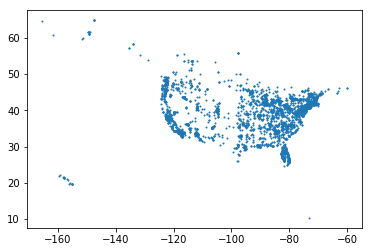

In [188]:
# UFO Plotting Logitude/latitude 
pyplot.scatter(long, lat, s=1)
pyplot.show()

## Analysis of Initial Scatter Plot of UFO Sightings: 

So, many people across the country saw UFO's in 2015, however, there is a large scarcity of sightings in middle/southwest as well as Alaska. This is most likely due to population density. More sightings in more populated areas could mean that a bunch of people witnessed the same event. 

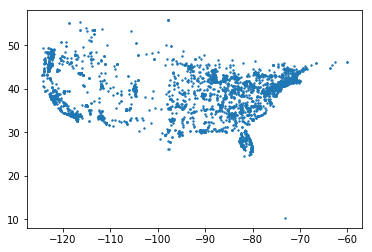

In [189]:
# Filtering Out Outliers

# make new list without alaska and hawaii 
lower_48_pairs = []
for pair in coord_pairs: 
    if pair[1] > -125:
        lower_48_pairs.append(pair)
        
lat_array = []
long_array = []
for pair in lower_48_pairs:
    lat_array.append(pair[0])
    long_array.append(pair[1])

pyplot.scatter(long_array, lat_array, s=2)
pyplot.show()

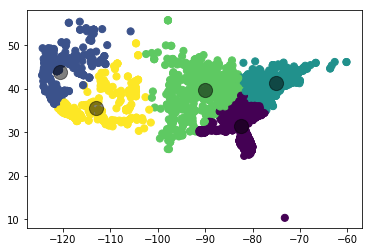

[(2, 1008), (3, 985), (4, 768), (0, 700), (1, 659)]
[ 41.26151933 -75.11222026]
1008
[ 39.67012605 -90.14408618]
985
[  35.56621337 -113.02582958]
768
[ 31.33054185 -82.40740403]
700
[  43.7790213  -120.67827161]
659


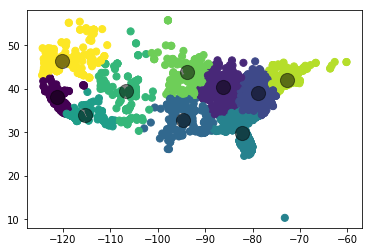

[(8, 581), (1, 579), (2, 566), (5, 494), (4, 485)]
[ 42.09760369 -72.78759626]
581
[ 40.41317115 -86.34462486]
579
[ 39.0149321  -78.79258822]
566
[  33.86058742 -115.3942688 ]
494
[ 29.79963722 -82.18969021]
485


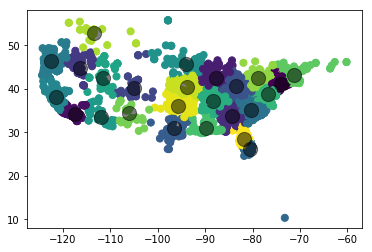

[(1, 329), (10, 298), (0, 286), (18, 273), (6, 258)]
[  34.14144225 -117.57180702]
329
[  46.28093275 -122.55183357]
298
[ 41.06460709 -74.07646425]
286
[ 43.07222439 -71.15282416]
273
[ 40.58933952 -83.41206235]
258


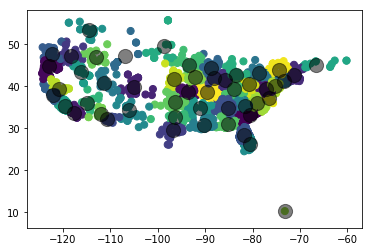

[(4, 256), (6, 213), (13, 174), (18, 168), (1, 156)]
[  33.76428763 -117.64017841]
256
[ 42.6878379  -71.22282663]
213
[ 28.36624843 -81.85283082]
174
[ 41.20567145 -73.44103279]
168
[  44.90078525 -122.88372737]
156


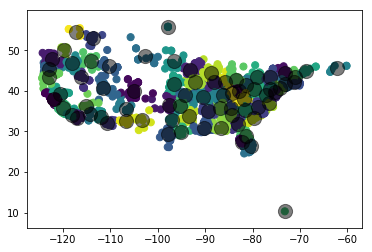

[(41, 172), (0, 146), (38, 139), (9, 139), (6, 128)]
[  34.02882333 -118.12883423]
172
[  37.91148131 -122.02732312]
146
[  33.53876348 -112.0124919 ]
139
[ 42.08766411 -88.14418485]
139
[  47.72020123 -122.35650022]
128


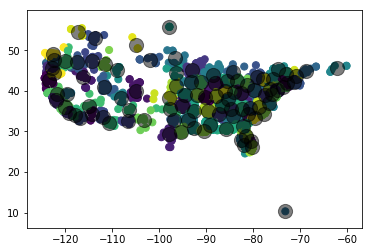

[(64, 169), (26, 144), (22, 139), (12, 126), (7, 122)]
[  33.99759352 -117.9395416 ]
169
[ 42.23909628 -71.25512838]
144
[  33.53876348 -112.0124919 ]
139
[  37.78488898 -122.00824753]
126
[ 41.94591684 -88.0982909 ]
122


In [190]:
# Clustering 
n_clusters = [5, 10, 25, 50, 75, 100]

for cluster in n_clusters:
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(lower_48_pairs)
    
#     predict the main regions of the UFO sightings 
    y_kmeans = kmeans.predict(lower_48_pairs)
    
        
    pyplot.scatter(long_array, lat_array, c=y_kmeans, s=50, cmap='viridis')

# predict the cluster_centers 
    centers = numpy.array(kmeans.cluster_centers_)
    pyplot.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5)
    pyplot.show()
    counter = Counter(y_kmeans).most_common(5)
    print(counter)
    
    for count in counter:
        print(centers[count[0]])
        print(count[1])

## Analysis of Clusters: 

N_Clusters closest that encompass most states: 50. However, this cluster breaks the bigger states like California and Texas up.  
    
top 5: 
1. Near LA
2. Sacremento, CA
3. Near Orlando, FL
4. Near Boston, MA
5. Near NY, NY 

These cluster predictions correlate with the most common state and cities based on counter analysis above with the state/city column. 


## Corelation with Airport Locations

In [191]:
airports = pandas.read_csv("us-airports.csv")
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,municipality,gps_code,local_code,keywords
0,3632,KLAX,large_airport,Los Angeles International Airport,33.942501,-118.407997,125.0,Los Angeles,KLAX,LAX,NaN
1,3754,KORD,large_airport,Chicago O'Hare International Airport,41.978600,-87.904800,672.0,Chicago,KORD,ORD,"CHI, Orchard Place"
2,3622,KJFK,large_airport,John F Kennedy International Airport,40.639801,-73.778900,13.0,New York,KJFK,JFK,"Manhattan, New York City, NYC, Idlewild"
3,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,1026.0,Atlanta,KATL,ATL,NaN
4,3878,KSFO,large_airport,San Francisco International Airport,37.618999,-122.375000,13.0,San Francisco,KSFO,SFO,"QSF, QBA"


All Airports


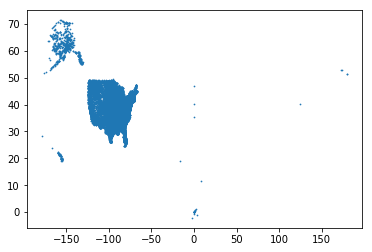

Analysis of All Airports:
Although most airports are in the continental US, some seem to be oversees. These could be sea plane airpots or helicopter airports. For this project, we will be focusing on the airports in the US, including Hawaii and Alaska.


In [192]:
# Plotting Medium and Large Airports
latitude = airports["latitude_deg"]
longitude = airports["longitude_deg"]
coord_pairs_lat = []
coord_pairs_long = []
for item in latitude:
    coord_pairs_lat.append(item)
for i in longitude:
    coord_pairs_long.append(i)
coordinates_full = zip(coord_pairs_lat,coord_pairs_long)

print("All Airports")
pyplot.scatter(coord_pairs_long,coord_pairs_lat, s=0.5)
pyplot.show()

print("Analysis of All Airports:")
print("Although most airports are in the continental US, some seem to be oversees. These could be sea plane airpots or helicopter airports. For this project, we will be focusing on the airports in the US, including Hawaii and Alaska.")

All US Airports


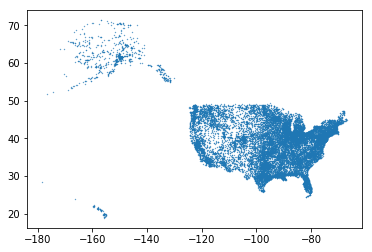

In [193]:
# Filtering Outliers 
latitudes2 = []
coord_pairs_US = []
longitudes2 = []
for x in coordinates_full:
    if x[1] < -50: 
        coord_pairs_US.append(x)
for z in coord_pairs_US: 
    latitudes2.append(z[0])
    longitudes2.append(z[1])
    
print("All US Airports")
pyplot.scatter(longitudes2,latitudes2, s=0.1)
pyplot.show()


As can be seen by this more specific map, between all types of aiports in the aforementioned locations, there are airports in most locations in the US, with some scarcity in the West and Midwest (excluding the west coast.)


US Large Airports(brown), Medium Aiports(orange)


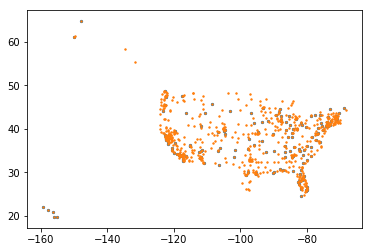

In [194]:
# Plotting Medium and Large Aiports on Same Graph
airport_large_lat = []
airport_large_long = []
airport_med_lat = []
airport_med_long = []
row_count = 0
row_countt = 0
type_air = airports["type"]
for typee in type_air: 
    if typee == 'large_airport': 
        airport_large_lat.append(airports["latitude_deg"][row_count])
        airport_large_long.append(airports["longitude_deg"][row_count])
        row_count +=1
    elif typee == 'medium_airport':
        airport_med_lat.append(airports["latitude_deg"][row_countt])
        airport_med_long.append(airports["longitude_deg"][row_countt])
        row_countt +=1
        

print('US Large Airports(brown), Medium Aiports(orange)')
pyplot.scatter(airport_large_long,airport_large_lat, s=5)
pyplot.scatter(airport_med_long,airport_med_lat, s=2)
pyplot.show()


With the amount of airports located in the US, we thought it necessary to focus on more specific types of airports in order to assess the relationships between airports and UFO sightings in the US. We decided to look at the location of medium and large airports as this would include the major aiports and therefore the ones that have more traffic. We see that they are more or less scatter with some clusters around the northeast, southeast, and west coast. One other cluster can be seen in the north in the upper Midwest region.

Filtered UFO Sightings


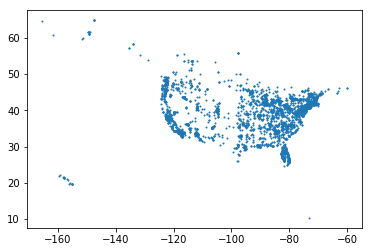

In [195]:
# Plotting filtered outlier UFO Sightings on Separate Graph 
print("Filtered UFO Sightings")
pyplot.scatter(long, lat, s=1)
pyplot.show()

As we can see by the two graphs, both have clusters of points in the northeast, southeast, and west coast, with a scarcity of points in the central/western US, Alaska, and Hawaii. In both graphs, we also see another possible clustering near the northern center of the US. This can be used to explain a possible cause of UFO sightings to be airplanes in the sky. Because sightings occur near large and medium sized airports, it is likely that what people are seeing and reporting as UFO’s are actually planes taking off or returning to airports.

## Adjusting for Population

Let's revisit the state by state statistics on UFO sighting reportings. Becuase of the variability in size, population, and density of states it is difficult to initially draw meaningful conclusions from the data. However we get a bit more information when we factor in the amount of poeple in each. 

In [289]:
pop_data = pandas.read_csv("population-density-measures.csv")

In [290]:
pop_data_edit = pop_data[1:]
new_list = []
for string in pop_data_edit["geo_state"]:
    new_list.append(string.replace(" ", ""))
pop_data_edit["geo_state"] = new_list
pop_data_edit.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic area,geo_state,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,density_people,Density per square mile of land area - Housing units
1,0100000US,NaN,United States,0400000US01,1.0,United States - Alabama,Alabama,4779736,2171853,52420.07,1774.74,50645.33,94.4,42.9
2,0100000US,NaN,United States,0400000US02,2.0,United States - Alaska,Alaska,710231,306967,665384.04,94743.10,570640.95,1.2,0.5
3,0100000US,NaN,United States,0400000US04,4.0,United States - Arizona,Arizona,6392017,2844526,113990.30,396.22,113594.08,56.3,25.0
4,0100000US,NaN,United States,0400000US05,5.0,United States - Arkansas,Arkansas,2915918,1316299,53178.55,1143.07,52035.48,56.0,25.3
5,0100000US,NaN,United States,0400000US06,6.0,United States - California,California,37253956,13680081,163694.74,7915.52,155779.22,239.1,87.8


In [291]:
print(state_counter.most_common(10))

[('California', 505), ('Florida', 306), ('Arizona', 179), ('NewYork', 173), ('Washington', 164), ('Ohio', 146), ('Oregon', 145), ('Pennsylvania', 140), ('Illinois', 121), ('Colorado', 113)]



California, Florida, and Virgina are some of the more populous states in the US. When we adjust for population where do they rank?


In [306]:
sightings_per_person = {}
population = {}
for state in state_counter:
    index = numpy.where(pop_data_edit["geo_state"] == state)
    try:
        index = index[0][0]
        if index != 0: 
            sightings_per_person.update({ state : state_counter[state]/pop_data_edit["Population"][index]})
            population.update({ state : pop_data_edit["Population"][index]})
    except:
        blank = 0
        
sorted_states = OrderedDict(sorted(sightings_per_person.items(), key=lambda t: t[1], reverse=True))
top = list(sorted_states)
print(top[0:15])

['Florida', 'Arizona', 'Ohio', 'California', 'Virginia', 'Tennessee', 'NewYork', 'Illinois', 'SouthCarolina', 'NewJersey', 'Idaho', 'Maryland', 'Wisconsin', 'Oregon', 'Pennsylvania']



While the disparity between California and other states is reduced, many of the states with the highest number of sightings remain at the top when adjusted for population. 


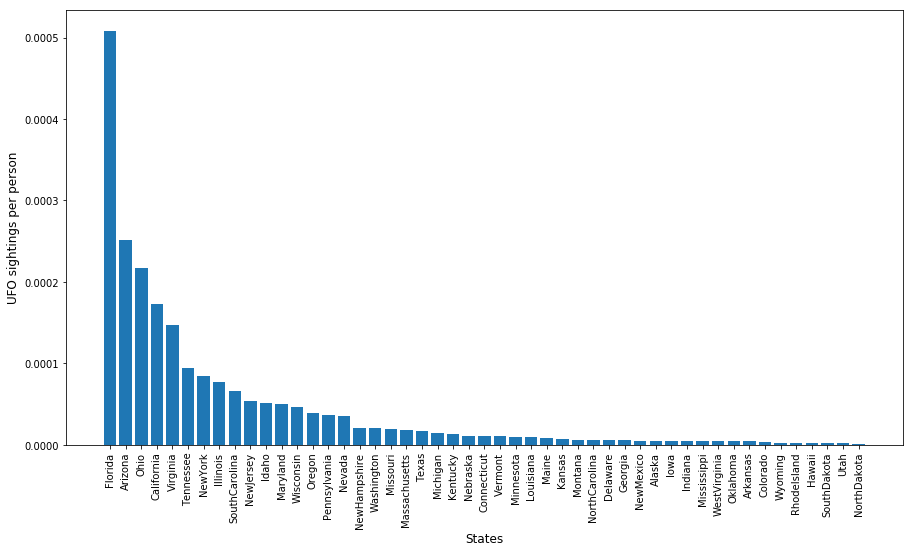

In [295]:
keys = []
counts = []
for x in sorted_states: 
    keys.append(x)
    counts.append(sorted_states[x])
pyplot.figure(figsize=(15,8))
pyplot.bar(keys, counts,  align='center', width=0.8)
pyplot.xticks(rotation=90, fontsize=10)
pyplot.xlabel("States", fontsize=12)
pyplot.ylabel("UFO sightings per person", fontsize=12)
pyplot.show()

## Military Bases

Another factor that we thought necessary to consider when analyzing UFO sightings was the presence of military bases. In areas with more military bases, there would likely be more air crafts, testing, and possib  which people could mistake for UFOs

In [296]:
military_data = pandas.read_csv("Military_Bases2.csv")
military_data.head()

,OBJECTID,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT,ShapeSTArea,ShapeSTLength
0,29,AF Active,Salinas N00207-JA,NaN,Puerto Rico,Puerto Rico,Active,1.116066e+06,5500.824535
1,66,AF Active,Los Angeles AFB,NaN,California,United States,Active,3.398381e+05,2506.755947
2,67,AF Active,Arnold AS,NaN,Tennessee,United States,Active,2.371972e+08,144104.967596
3,68,AF Active,Bellows AFS,NaN,Hawaii,United States,Active,7.032280e+06,15032.026568
4,69,AF Active,Birch Lake Recreation Annex,NaN,Alaska,United States,Active,1.094464e+06,7458.385993


In [297]:
length_of_set = print(len(military_data['OBJECTID']))

# fix spaces in values 
new_list_mil = []
for string in military_data["STATE_TERR"]:
    new_list_mil.append(string.replace(" ", ""))
military_data["STATE_TERR"] = new_list_mil
military_data.head(5)

750


,OBJECTID,COMPONENT,SITE_NAME,JOINT_BASE,STATE_TERR,COUNTRY,OPER_STAT,ShapeSTArea,ShapeSTLength
0,29,AF Active,Salinas N00207-JA,NaN,PuertoRico,Puerto Rico,Active,1.116066e+06,5500.824535
1,66,AF Active,Los Angeles AFB,NaN,California,United States,Active,3.398381e+05,2506.755947
2,67,AF Active,Arnold AS,NaN,Tennessee,United States,Active,2.371972e+08,144104.967596
3,68,AF Active,Bellows AFS,NaN,Hawaii,United States,Active,7.032280e+06,15032.026568
4,69,AF Active,Birch Lake Recreation Annex,NaN,Alaska,United States,Active,1.094464e+06,7458.385993


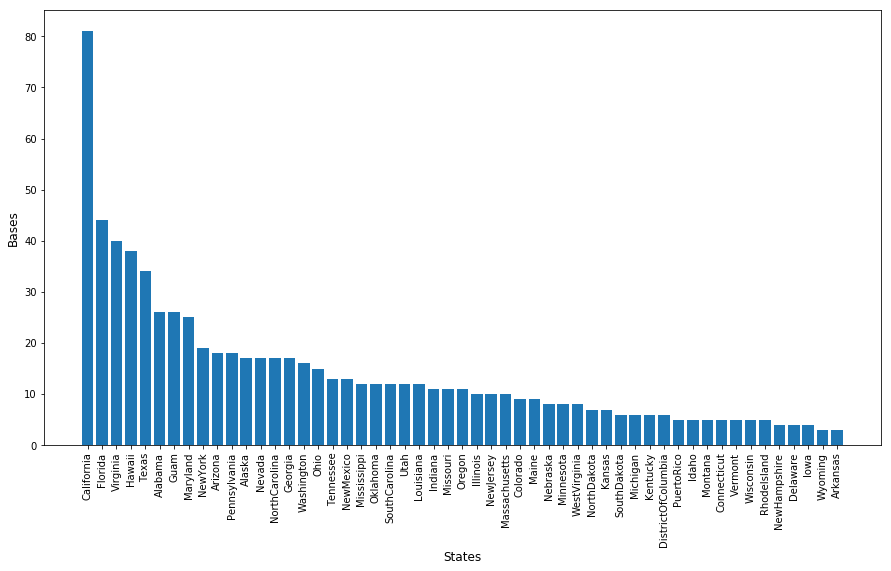

In [298]:
# Military bases by state
state_base_counter = Counter(military_data['STATE_TERR'])
ordered_states = OrderedDict(state_base_counter.most_common())
keys = []
counts = []
for x in ordered_states: 
    keys.append(x)
    counts.append(state_base_counter[x])
pyplot.figure(figsize=(15,8))
pyplot.bar(keys, counts,  align='center', width=0.8)
pyplot.xticks(rotation=90, fontsize=10)
pyplot.xlabel("States", fontsize=12)
pyplot.ylabel("Bases", fontsize=12)
pyplot.show()

In [304]:
# Military bases by person for each state
state_mil_counter = Counter(military_data['STATE_TERR'])
ordered_states = OrderedDict(state_mil_counter.most_common())
base_by_person = {}
for x in population: 
    base_by_person.update({x : state_mil_counter[x]/population[x]})
order_base_by_person = OrderedDict(sorted(base_by_person.items(), key=lambda t: t[1], reverse=True))

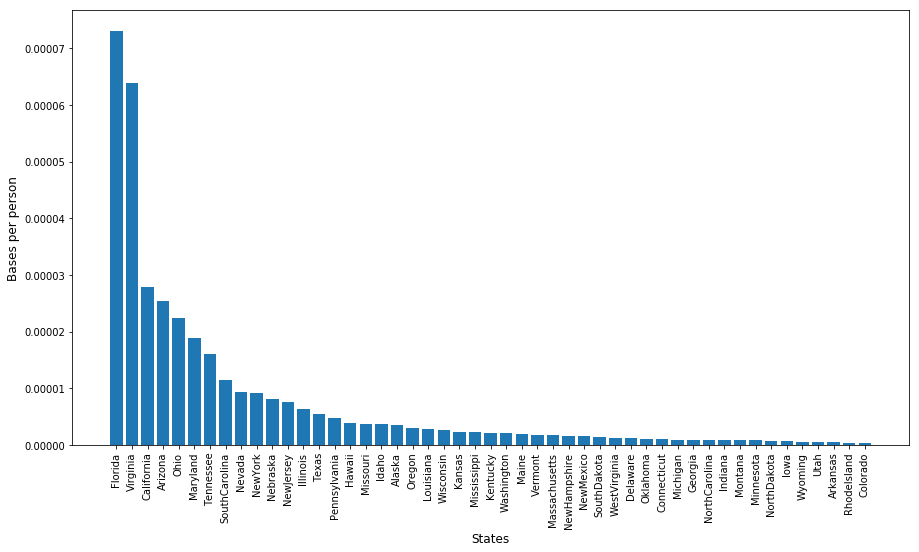

In [305]:
keys_mil = []
counts_mil = []
for x in order_base_by_person:
    keys_mil.append(x)
    counts_mil.append(order_base_by_person[x])
pyplot.figure(figsize=(15,8))
pyplot.bar(keys_mil, counts_mil,  align='center', width=0.8)
pyplot.xticks(rotation=90, fontsize=10)
pyplot.xlabel("States", fontsize=12)
pyplot.ylabel("Bases per person", fontsize=12)
pyplot.show()

After adjusting for concentration of bases in each state, we noticed that many of the states with more military bases per person also had a higher number of UFO reports per person.

## Military Correlation and Significance

We wanted to test the correlation between these two factors and observe the significance of this relationship. To do this we used a pearson correlation with a hypothesis test to measure the significance of this finding. 

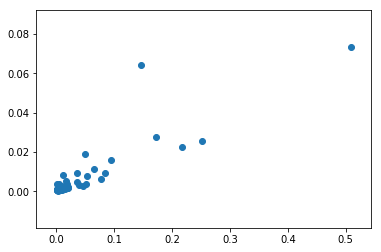

In [326]:
# code for dicts adapted from https://code.tutsplus.com/tutorials/how-to-merge-two-python-dictionaries--cms-26230

from itertools import chain
from collections import defaultdict

# add scale so can accurately see scatter
scale = 1000
merged = defaultdict(list)
for s, b in chain(sightings_per_person.items(), base_by_person.items()):
    merged[s].append(b)
sightings = []
bases = []
for x in merged:
    sightings.append(merged[x][0]*scale)
    bases.append(merged[x][1]*scale)

pyplot.scatter(sightings, bases)
pyplot.show()


In [352]:
correlation = numpy.corrcoef(sightings, bases)[0][1]
print(correlation)

0.8755094767596053


In [355]:
# Hypothesis test adapted from https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/hypothesis-test-examples
sample = numpy.empty(20000)
for i in range(20000):
    sightings_permuted = numpy.random.permutation(sightings)
    sample[i] = numpy.corrcoef(sightings_permuted, bases)[0][1]
p_val = numpy.sum(sample >= correlation) / len(sample)
print("calculated p-value =", p_val)

# cross check against internal scipy method
scipy_value = scipy.stats.pearsonr(sightings, bases)[1]
print("scipy p-value =", scipy_value)


calculated p-value = 0.0
scipy p-value = 1.8735491292534348e-16


The correlation coefficient is around 0.876, indicating that there is a moderate to high correlation between these variables, with a p value of nearly 0. This indeicates that these results are significant and replicable.

## Continuing UFO Column Cleans

In [196]:
#Duration Clean 

duration_column = ufo['Duration']
expression = re.compile("\[(.*?)\]")

duration_cleaned = []
dur_cleaned2 = []

# Sort through JSON object using regular expression
for value in duration_column:
    results = expression.findall(value)
    split_res = re.split(", ", results[0])
    duration_cleaned.append(split_res)


dur_cleaned3 = []
# Filter the missing data points as 0. 
for elem in duration_cleaned:
    if elem[0] == '"NoInput"':
        dur_cleaned3.append(['0', '"NoInput"'])
    elif elem[0] == '"NotAvailable"':
        dur_cleaned3.append(['0', '"NotAvailable"'])
    else:
        dur_cleaned3.append(elem)
    
# Making everything into minutes because that's the most common occurance
dur_cleaned_mins = []
for elem in dur_cleaned3:
    if elem[1] == '"NoInput"':
        dur_cleaned_mins.append(float(0))
    if elem[1] == '"NotAvailable"':
        dur_cleaned_mins.append(float(0))
    elif elem[1] == '"Hours"':
        dur_cleaned_mins.append(float(elem[0])*60)
    elif elem[1] == '"Seconds"':
        dur_cleaned_mins.append(float(elem[0])/60)
    elif elem[1] == '"Minutes"':
        dur_cleaned_mins.append(float(elem[0]))
    elif elem[1] == '"Weeks"':
        dur_cleaned_mins.append(float(elem[0])*604800)
    elif elem[1] == '"Months"':
        dur_cleaned_mins.append(float(elem[0])*2419200)
    elif elem[1] == '"Years"':
        dur_cleaned_mins.append(float(elem[0])*29030400)
    elif elem[0][:14] == "MixedMagnitude":
        dur_cleaned_mins.append(0)
    elif elem[1] == '"Days"':
        dur_cleaned_mins.append(float(elem[0])*86400)
        

ufo['Duration'] = dur_cleaned_mins


## UFO Shape Analysis 

Shape Count= 4163
Counter({'light': 943, 'circle': 547, 'fireball': 395, 'Missing["NotAvailable"]': 372, 'triangle': 367, 'sphere': 270, 'other': 240, 'oval': 164, 'disk': 150, 'formation': 127, 'changing': 100, 'flash': 95, 'cigar': 73, 'rectangle': 67, 'diamond': 62, 'chevron': 52, 'cylinder': 47, 'teardrop': 37, 'cone': 25, 'egg': 18, 'cross': 12})

Histogram of all Durations With Filtered Outliers


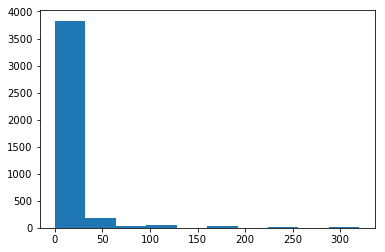


Fireball
[('Florida', 40), ('California', 35), ('NewYork', 16), ('Pennsylvania', 16), ('NorthCarolina', 15)]
Fireball Overall Probability= 0.09488349747778045
Fireball Average Duration in Minutes = 11.1863520408
Fireball Variance = 887.243932923


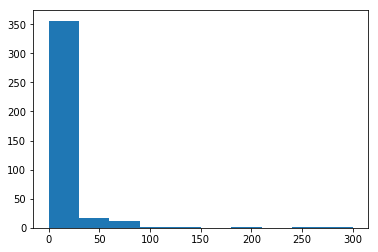


Circle
[('California', 51), ('Florida', 37), ('Oregon', 30), ('Arizona', 28), ('NewYork', 28)]
Circle Overall Probability= 0.13139562815277445
Circle Average Duration in Minutes = 14.5217245582
Circle Variance = 1284.16388971


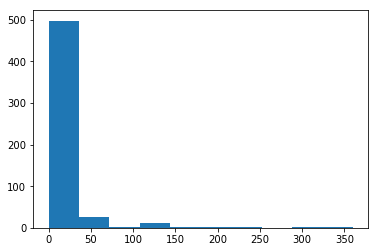


Triangle
[('California', 33), ('Florida', 25), ('Washington', 20), ('Arizona', 17), ('Ohio', 17)]
Triangle Overall Probability= 0.08815757866922892
Triangle Average Duration in Minutes = 11.6993188011
Triangle Variance = 1244.69498213


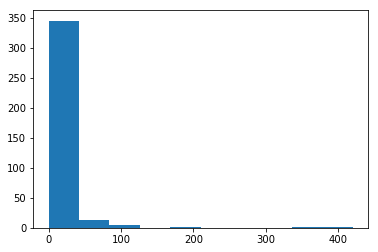


Disk
[('Florida', 14), ('Washington', 12), ('California', 9), ('Ohio', 8), ('Colorado', 6)]
Disk Overall Probability= 0.0360317079029546
Disk Average Duration in Minutes = 17.5884444444
Disk Variance = 3151.52637017


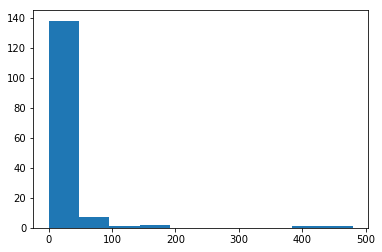


Light
[('Florida', 84), ('California', 83), ('NewYork', 50), ('Pennsylvania', 42), ('Arizona', 37)]
Light Overall Probability= 0.2265193370165746
Light Average Duration in Minutes = 12.1095070922
Light Variance = 1079.2955187


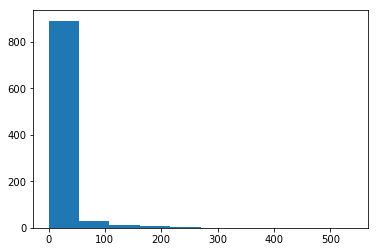


Cone
[('Washington', 4), ('Florida', 3), ('NewYork', 2), ('Connecticut', 2), ('California', 2)]
Cone Overall Probability= 0.006005284650492433
Cone Average Duration in Minutes = 18.2126666667
Cone Variance = 3367.158384


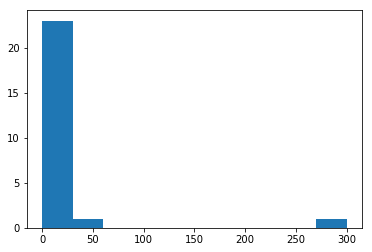


Flash
[('Florida', 8), ('California', 6), ('NewYork', 6), ('Oregon', 5), ('Ohio', 5)]
Flash Overall Probability= 0.022820081671871245
Flash Average Duration in Minutes = 8.15122807018
Flash Variance = 253.982293813


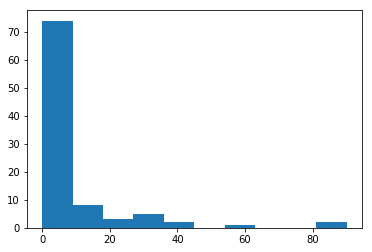


Diamond
[('Florida', 11), ('Washington', 6), ('California', 5), ('Illinois', 3), ('SouthCarolina', 3)]
Diamond Overall Probability= 0.014893105933221235
Diamond Average Duration in Minutes = 17.2294354839
Diamond Variance = 1391.42525922


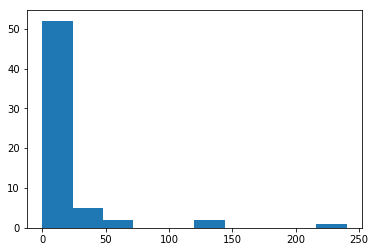

In [197]:
# Shape Column 

shape_counter = Counter(ufo['Shape'])
shape_length = len(ufo['Shape'])
print("Shape Count= "+ str(shape_length))
print(shape_counter)

duration_list = []
for duration in ufo['Duration']:
    duration_list.append(duration)

# create lists for most common shapes and shapes per state 
state_fireball = []
fireball_dur = []
state_circle = []
circle_dur = []
state_triangle = []
triangle_dur = []
state_disk = []
disk_dur = []
state_light = []
light_dur = []
state_formation = []
state_cone = []
cone_dur = []
state_flash = []
flash_dur = []
state_diamond = []
diamond_dur = []
row_count = 0

light_1000_count = 0
# append shape instance to respective list 
for shape in ufo['Shape']:
    if shape == 'fireball':
        state_fireball.append(ufo['State'][row_count])
        #  filtering outlier because there's only 3 that are way above 1000 minutes
        if ufo['Duration'][row_count] < 1000:
            fireball_dur.append(ufo['Duration'][row_count])
        row_count +=1
    elif shape == 'circle':
        state_circle.append(ufo['State'][row_count])
        circle_dur.append(ufo['Duration'][row_count])
        row_count +=1
    elif shape == 'triangle':
        state_triangle.append(ufo['State'][row_count])
        triangle_dur.append(ufo['Duration'][row_count])
        row_count +=1
    elif shape == 'disk':
        state_disk.append(ufo['State'][row_count])
        disk_dur.append(ufo['Duration'][row_count])
        row_count +=1
    elif shape == 'light':
        state_light.append(ufo['State'][row_count])
        #  filtering outlier because there's only 3 that are way above 1000 minutes
        if ufo['Duration'][row_count] < 1000:
            light_dur.append(ufo['Duration'][row_count])
        else:
            light_1000_count += 1
        row_count +=1
    elif shape == 'cone':
        state_cone.append(ufo['State'][row_count])
        cone_dur.append(ufo['Duration'][row_count])
        row_count +=1
    elif shape == 'flash':
        state_flash.append(ufo['State'][row_count])
        flash_dur.append(ufo['Duration'][row_count])
        row_count +=1
    elif shape == 'diamond':
        state_diamond.append(ufo['State'][row_count])
        diamond_dur.append(ufo['Duration'][row_count])
        row_count +=1
print()
print("Histogram of all Durations With Filtered Outliers")
pyplot.hist(duration_list, range=(0,320))
pyplot.show()

            
print()
print("Fireball")
print(Counter(state_fireball).most_common(5))
print("Fireball Overall Probability= " + str(len(state_fireball)/shape_length))
print("Fireball Average Duration in Minutes = "+ str(stats.mean(fireball_dur)))
print("Fireball Variance = "+ str(numpy.var(fireball_dur)))

pyplot.hist(fireball_dur)
pyplot.show()

print()
print("Circle")
print(Counter(state_circle).most_common(5))
print("Circle Overall Probability= " + str(len(state_circle)/shape_length))
print("Circle Average Duration in Minutes = "+ str(stats.mean(circle_dur)))
print("Circle Variance = "+ str(numpy.var(circle_dur)))

pyplot.hist(circle_dur)
pyplot.show()

print()
print("Triangle")
print(Counter(state_triangle).most_common(5))
print("Triangle Overall Probability= " + str(len(state_triangle)/shape_length))
print("Triangle Average Duration in Minutes = "+ str(stats.mean(triangle_dur)))
print("Triangle Variance = "+ str(numpy.var(triangle_dur)))

pyplot.hist(triangle_dur)
pyplot.show()

print()
print("Disk")
print(Counter(state_disk).most_common(5))
print("Disk Overall Probability= " + str(len(state_disk)/shape_length))
print("Disk Average Duration in Minutes = "+ str(stats.mean(disk_dur)))
print("Disk Variance = "+ str(numpy.var(disk_dur)))

pyplot.hist(disk_dur)
pyplot.show()

print()
print("Light")
print(Counter(state_light).most_common(5))
print("Light Overall Probability= " + str(len(state_light)/shape_length))
print("Light Average Duration in Minutes = "+ str(stats.mean(light_dur)))
print("Light Variance = "+ str(numpy.var(light_dur)))

pyplot.hist(light_dur)
pyplot.show()



print()
print("Cone")
print(Counter(state_cone).most_common(5))
print("Cone Overall Probability= " + str(len(state_cone)/shape_length))
print("Cone Average Duration in Minutes = "+ str(stats.mean(cone_dur)))
print("Cone Variance = "+ str(numpy.var(cone_dur)))

pyplot.hist(cone_dur)
pyplot.show()

print()
print("Flash")
print(Counter(state_flash).most_common(5))
print("Flash Overall Probability= " + str(len(state_flash)/shape_length))
print("Flash Average Duration in Minutes = "+ str(stats.mean(flash_dur)))
print("Flash Variance = "+ str(numpy.var(flash_dur)))

pyplot.hist(flash_dur)
pyplot.show()

print()
print("Diamond")
print(Counter(state_diamond).most_common(5))
print("Diamond Overall Probability= " + str(len(state_diamond)/shape_length))
print("Diamond Average Duration in Minutes = "+ str(stats.mean(diamond_dur)))
print("Diamond Variance = "+ str(numpy.var(diamond_dur)))

pyplot.hist(diamond_dur)
pyplot.show()





## Analysis of Shape Information by State and Duration

State--
Light, circle, and fireball were the most common shapes. However, the two most common states for each of these shapes were California and Florida, which are on opposite sides of the country. This might suggest that there have many occurances of UFO sightings and that people are not just seeing the same event happening from nearby vicinities. Additionally, seeing a light, fireball, or circle could also indicate that these UFO sightings were meteorites coming into the atmosphere and not aliens because these terms are also used to describe meteorites.

Duration-- 
All of the variances for shapes are actually very large. This means that there's a great deal of range for the duration values. However, the mean for these varies between 8.15 minutes (flash) to 18.21 minutes (Cone). This range of times could reasonably be appropriate for how long meteor showers occur. 
